<a id="historyagain"></a>
# History revisited

- During "winter" for neural models, some researchers worked - mainly in isolation - on problems regarding neural models
- Results paved way for a later "revolution"

- Amongst them [Georg Cybenko](https://en.wikipedia.org/wiki/George_Cybenko) 
- Proof of  "universal approximaiton theorem" (see below)
- Together with the backpropagation algorithm applied by Hinton, gave new hope to research in multi layer neural networks

<img src="https://c1.staticflickr.com/9/8568/15881996631_f9029074d5_b.jpg" width=600 heigth=600>

(After the theorem, Cybenko shifted his attention to other areas and problems of mathematics, and thus is not part of the "deep learning movement".)  

## Universal approximation theorem (Cybenko, 1989)

Let $F$ be a continuous function on a closed and bounded subset of $\mathbb R^n$ and $\sigma$ any sigmoid-like function, that is, $\sigma:\mathbb R\rightarrow\mathbb R$, continuous and $\lim_{x \to -\infty} \sigma(x) = 0$ and $\lim_{x \to \infty} \sigma(x) = 1$. Then for any $\epsilon>0$ there exists a $\hat{f}$ finite neural network with a single hidden layer whose activation function is $\sigma$  and which is closer to $f$ than $\epsilon$, that is,

$$\forall \mathbf x \in \mathrm{Dom}(f): \left|~f(\mathbf x) - \hat{f}(\mathbf x)\right|< \epsilon$$

Original paper: https://www.dartmouth.edu/~gvc/Cybenko_MCSS.pdf. Somewhat clearer version of the original proof: http://mcneela.github.io/machine_learning/2017/03/21/Universal-Approximation-Theorem.html.

Illustration:

<img src="http://drive.google.com/uc?export=view&id=1xIKYRXMchV6B6C9WmhwK0qCENbkIYGiv" style="width: 45%;">

[Source](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.101.2647&rep=rep1&type=pdf)


### Some generalizations

- Hornik, 1990: The theorem also holds for continuous, bounded and not constant activation functions: http://zmjones.com/static/statistical-learning/hornik-nn-1991.pdf

- Leshno et al, 1993: It is enough to require piecewise continuity and so called local boundedness if the function is not polynomial.


### Intuitive explanation

- Intuitive explanation of the theorem can be found in [Chapter 4 of Neural Networks and Deep Learning]
- Function approximations can be put together from basic blocks of linear functions and sigmoid-like nonlinearities (http://neuralnetworksanddeeplearning.com/chap4.html).

## Learning method for deep architectures: Backpropagation

Parameter optimization with Gradient Descent requires at every step of the process the calculation of
+ The loss: value of  $L$ loss function on the training data set $D=\{d_1,\dots,d_N\}$ with actual parameters $\theta$: $$L_D(\theta)$$
+ The gradient of the loss in respect to a change for the actual parameters:
$$\frac{\partial L_D(\theta)}{\partial \theta}.$$

Since the loss is typically the average of losses on the examples of the dataset, both calculation tasks can be reformulated in terms of the loss and gradient on individual examples:

$$L_D(\theta) = \frac{1}{N}\sum_d L_d(\theta)$$

 $$\frac{\partial L_D(\theta)}{\partial \theta}=\frac{1}{N}\sum_d\frac{\partial L_d(\theta)}{\partial \theta}$$


Note: derivation task is NOT symbolic -> not interested in derivative of $L$ in general (e.g. as a symbolic formula) but only its numerical value for the actual parameters.


Key for the solution is that we can build a circuit-like _computational graph_ for the loss:
- Parameters and training data are inputs entering at the leaves 
- Nodes are simple _mathematical operations_ that act as gates transforming their numeric inputs to outputs
- Mathematical operations in question typically (at least piecemeal) differentiable functions of inputs

-> Repeated functional transformation


### A toy example

Regression task with training data  $\langle  x_1,y_1\rangle, \dots,\langle x_N,y_N\rangle$ using the "network"

<img src="http://drive.google.com/uc?export=view&id=1xbYaI7j7AcBFvOyI80XJAlWmkeuxOCfH" width="150">

which computes 

$$\hat{y} = w\cdot x  + b$$

as a prediction for an $x$ input. Using squared loss, loss for a single $d=\langle x, y\rangle$ example:

$$L_d(\langle w, b \rangle) = (\hat y -y)^2 = (wx + b - y)^2
$$
corresponding computational graph can be 

<img src="http://drive.google.com/uc?export=view&id=1517qyzShAbQ5flRIVXErIxmwI1GFwmDS" width="500">

### Forward pass

Assume current parameter values are $w = 3$ and $b = 2$, and the current example is $x = 4, y = 5$. To calculate loss on this training example, have to calculate final output of graph by calculating output of all internal operation nodes/gates as values flow from left to right:

<img src="http://drive.google.com/uc?export=view&id=1YRkPfxLl8vkaKANFz0yoxhv-jmY2fPrD" width="500px">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
x = 4; y = 5; w = 3; b = 2
prod = x * w
y_hat  = prod + b
error = y_hat - y
loss = error ** 2
print(f"The loss for w={w}, b={b}, x={x} and y={y} is {loss}.")

The loss for w=3, b=2, x=4 and y=5 is 81.


And that is all for the __forward pass__ on our computational graph.

### Backpropagation

Having calculated the value of the loss function for the current example, our next task is to compute the gradient of the parameters:

$$\frac{\partial L_d(\theta)}{\partial \theta}= \left\langle \frac{\partial L_d(w)}{\partial w}, \frac{\partial L_d(b)}{\partial b}\right\rangle
$$

for which we have to calculate the partial derivative of the loss with respect to $w$ and $b$. Somewhat surprisingly, in this case we can work backwards, from right to left by computing partial derivatives with respect to the operation outputs until we reach the partial derivatives of $L$ we are interested in, with respect to $w$ and $b$. (This is the so called "backpropagation of error" [although "backpropagation of loss" would be more precise on our case]).

The mathematical ground for doing so is the **chain rule** for derivatives, according to which

$$
\frac{\partial F}{\partial \alpha} = \frac{\partial F}{\partial \beta} \cdot \frac{\partial \beta}{\partial \alpha}
$$
which, for our purposes, means that we can calculate the derivative of the loss with respect to any value $\alpha$ in the computational graph which is the input of an $f$ operation with the $\beta$ output simply as

$$
\frac{\partial L}{\partial \alpha} = \frac{\partial L}{\partial \beta} \cdot \frac{\partial \beta}{\partial \alpha} = 
\frac{\partial L}{\partial \beta} \cdot \frac{\partial f(\alpha)}{\partial \alpha}
$$

To do that, we need to know the derivative of the operations in the graph, which are, fortunately, very simple:

$$
\frac{\partial x^2}{\partial x} = 2x
$$

$$
\frac{\partial (x - y)}{\partial x} = 1, \frac{\partial (x - y)}{\partial y} = -1
$$

$$
\frac{\partial (x + y)}{\partial x} = 1, \frac{\partial (x + y)}{\partial y} = 1
$$

$$
\frac{\partial (x \cdot y)}{\partial x} = y, \frac{\partial (x \cdot y)}{\partial y} = x
$$




Using these derivatives and applying the chain rule step by step the loss derivatives can be calculated as

<img src="http://drive.google.com/uc?export=view&id=1johrny_RNeV14iatNruZ0h_jXhb6kCyj" width="500px">

In [3]:
d_error = 2 * error # for the first operation node we can directly calculate the derivative
d_y_hat = d_error * 1
d_b = d_y_hat * 1
print(f"d_b is {d_b}")
d_prod = d_y_hat * 1
d_w = d_prod * x
print(f"d_w is {d_w}")

d_b is 18
d_w is 72


### Generalization
- Method of computing loss and its gradient with recursive forward pass and backpropagation on a computational graph with simpler differentiable operations as nodes can be used to efficiently implement Gradient Descent for feed-forward neural networks in general. 
- All modern neural network frameworks use variants of this approach to implement gradient decent. 
- Important difference to our toy example is that "real life" computational graphs for neural networks mostly contain operations with higher dimensional (vector/matrix/tensor) arguments
- Frameworks have to provide efficient implementations of the derivatives of these operations, e.g., that of matrix multiplication. 

Simple example of a __vectorized__ computational graph, consider the following network with a hidden layer:

<img src="http://drive.google.com/uc?export=view&id=1F4TOpCCuRKh8Bvh7FJRKEXq7Ex-OS2Nr" width="350px">


Mathematically, if the hidden layer's weights are $\mathbf W = \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23}\end{bmatrix}$, its biases are  $\mathbf {b}^h = \begin{bmatrix}b^h_1 \\ b^h_2 \end{bmatrix}$, the output layer's weights are $\mathbf v =\begin{bmatrix}v_1 & v_2\end{bmatrix}$ and its bias is $b$ then the network's output for an $\mathbf x = \begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}$ input is 

$$ \hat y = \begin{bmatrix}v_1 & v_2\end{bmatrix}\cdot \sigma \left ( \begin{bmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23}\end{bmatrix} \cdot \begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix} + \begin{bmatrix}b^h_1 \\ b^h_2 \end{bmatrix}\right ) + b = \mathbf v \cdot \sigma(\mathbf W\cdot \mathbf x  + \mathbf {b}^h) + b $$

Accordingly, the corresponding computational graph in terms of matrices and vectors is along the lines of 

<img src="http://drive.google.com/uc?export=view&id=1HO9C0srDTZTT6ZYAQmCRhLj89yFwd03d" width="500px">


<a id="vanish"></a>
### The problem of vanishing gradients
- Deep networks consisting of a large number of stacked dense layers and sigmoid-like nonlinearities have so-called "vanishing gradients" problem
- Gradients for weights in deep layers become very small
- Consequently, the weights do not really change during gradient decent -- neurons in the deep layers "don't learn".


Take the simples possible of a "deep network" with $n$ hidden and one output layer and without biases:

$$
\hat y = w^o\cdot(\sigma(w_n\dots\sigma(w_3\cdot\sigma(w_2\cdot\sigma(w_1\cdot x)))\dots)
$$

for a scalar input.

Consider, again, the gradient for the $L$ squared error loss on the $\langle x, y\rangle$ example. The computational graph  looks like

<img src="http://drive.google.com/uc?export=view&id=1MVpM7AgyLZtYYi43dLDgm6rf3USmy-6d" width="800px">

and using the chain rule for a $w_k$ hidden layer weight the corresponding gradient of $L$ is:

$$
\frac{\partial L}{\partial w_k} = \frac{\partial z_k}{\partial w_k}\cdot \frac{\partial a_{k}}{\partial z_{k}} \cdot \frac{\partial z_{k+1}}{\partial a_{k}} \cdot  \frac{a_{k+1}}{z_{k+1}}\cdot \cdots \cdot \frac{\partial z_{n}}{\partial a_{n-1}}\cdot \frac{\partial a_{n}}{\partial z_{n}}\cdot \frac{\partial \hat y}{\partial a_{n}} \cdot \frac{\partial L}{\partial \hat y} = 
$$



$$
=   a_{k-1} \cdot  \sigma'(z_{k}) \cdot w_{k+1}\cdot\sigma'(z_{k+1}) \cdot\cdots \cdot  w_{n} \cdot  \sigma'(z_{n})\cdot w^o \cdot 2e
$$

$$
=  a_{k-1} \cdot \sigma'(z_k)\cdot \left ( \prod_{i=k+1}^{n}  w_{i} \cdot \sigma'(z_i) \right ) \cdot w^o \cdot 2e
$$

the gradient for the $k$-th weight is a product containing the four factors $ a_{k-1}, \sigma'(z_k), w^o , 2e$ and the $n-k$ factors  $w_{i} \cdot \sigma'(z_i)$ for all hidden layers "above" the weight in question. Taking a look at the derivative of the sigmoid function:

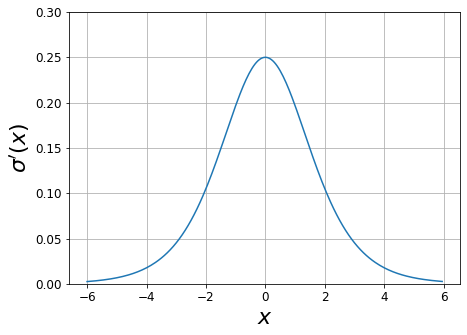

In [4]:
def derivative_sigmoid(x):
  return sigmoid_array(x)*(1-sigmoid_array(x))

def sigmoid_array(x):                                        
   return 1 / (1 + np.exp(-x))
  
X = np.arange(-6.0,6.0,0.05)
Y_derivative_sig = derivative_sigmoid(X)
plt.figure(figsize=(7,5))
plt.plot(X,Y_derivative_sig,'-')
plt.ylim(0,0.3); plt.grid(), plt.xlabel('$x$', fontsize=22); plt.ylabel("$σ'(x)$", fontsize=22)
plt.show()


its value is always in the $(0,\frac{1}{4}]$ interval and quickly approaches 0 in both directions_ 
- Weights are typically randomly initialized with a $\mathcal N(\mu = 0, \sigma^2=1)$ normal distribution.
- Can expect that -- at least in the beginning -- majority of weights in $[-1,1]$ interval.
- Can thus estimate absolute value of individual factors related to higher hidden layers as:

$$
| w_{i} \cdot \sigma'(z_i) | \leq \frac{1}{4}
$$
from which the factor corresponding to all higher layers together can be estimated as 
$$
\left |\prod_{i=k+1}^{n}  w_{i} \cdot \sigma'(z_i)\right | \leq \left(\frac{1}{4}\right )^{n-k}.
$$

- Since the $n-k$ exponent is exactly the __depth__ of $w_k$ in the hidden layer hierarchy, on average, the weight gradients shrinks exponentially as depth grows -- gradients are vanishing. 
- Problem can become especially acute when a large number of the higher neurons **saturate**, their weights cause their $z_i$ to have a high absolute value for which $\sigma'(z_i)$ is very close to 0.

#### Generality and solutions 

Can be shown by similar arguments that deep networks of stacked hidden sigmoid-like layers are in general susceptible to the vanishing gradients problem because of the multiplication factors that are added by the higher layers to the weight gradient.


A large number of tools/techniques were developed to mitigate the problem including new

+ weight initialization regimes,
+ network topologies,
+ activation functions,
+ regularization methods

### Further reading

+ The above exposition of backpropagation was inspired by [that of Andrej Karpathy](http://cs231n.github.io/optimization-2/), which is worth reading.
+ Detailed but nonetheless easy to follow explanations of backpropagation and the vanishing gradients problem can be found in chapters [2](http://neuralnetworksanddeeplearning.com/chap2.html) and [5](http://neuralnetworksanddeeplearning.com/chap5.html) of the online [Neural Networks and Deep Learing book](http://neuralnetworksanddeeplearning.com/).

## Sidenote: Was backprop and universality enough?

How come, that although by the late 80s the important intellectual breakthroughs were there, deep learning only became a success in 2012 ovwards?

Hinton himself argues, that there are three major factors 

In [5]:

from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/o8otywnWwKc?rel=0&amp;start=287&end=368" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

We are inclined to accept his views on the paramount importance of abundant data and computational power. We can say, that the success of deep learning rests on them, thus the development of data capital and computational power is paramount to the advancement of deep learninig.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9d/Moore%27s_Law_Transistor_Count_1971-2016.png" width=600 heigth=600>

(And as ["Moore's law seems to end"](https://www.analyticsindiamag.com/moores-law-is-dead-and-the-tech-giants-had-clearly-anticipated-it/), a big race starts for custom AI hardware again.)

What we should add, though, that "some technical advances" are also essential, so we will use the rest of the course to elaborate on them in detail. :-)

### How much is enough data?

A nice experiment can shed some light on how much is "enough" from data in case of an **extremely simple problem** and a **very simple neural net**. This may add some feeling about "proportions".

- Two inputs
- 25 nodes in the hidden layer, and one output
- A rectified linear activation function used for the nodes in the hidden layer
- Binary classification problem so the model can use the sigmoid activation function on the output layer to predict the probability of a sample belonging to class 0 or 1.

The original experiment can be found here: 
["Impact of Dataset Size on Deep Learning Model Skill And Performance Estimates"](https://machinelearningmastery.com/impact-of-dataset-size-on-deep-learning-model-skill-and-performance-estimates/)

- Separate to noisy "circles"
- "...two inputs, 25 nodes in the hidden layer, and one output..."

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Four-Scatter-Plots-of-the-Circles-Dataset-Varied-by-the-Amount-of-Samples.png" width=55%>

**Results:**

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Box-and-Whisker-Plots-of-Test-Set-Accuracy-of-MLPs-Trained-with-Different-Sized-Training-Sets-on-the-Circles-Problem.png" width=55%>

Sharp increase in stability from 100 to 1000 training examples for such really simple task.

<a id="vanish"></a>
# Activation functions


## General characterization

We have seen that during backpropagation we have to compute the partial derivative of the loss for our training data, which involves the computation of the derivative of the activations on the data $\Longrightarrow$ The efficiency of backpropagation depends on the structure of the derivative, which in turn largely depends on the properties of the derivatives of the used activation functions.

### Some definitions

*Activation function*: $f: R\rightarrow R$ is almost everywhere differentiable

*Saturation*: $f(x)$ (right) saturates if $$\lim_{x\to\infty} f'(x)=0$$

*Hard saturation*:  $f(x)$ "hard" saturates if  $\exists c$, such that $x>c \rightarrow f'(x)=0$

If a function saturates but does not hard saturate (like the sigmoid) then it "soft" saturates.

Activation functions are somtimes also knowns as transfer functions

### Important properties

- Boundedness
- Range -- is it zero centered?
- Ability to discriminate
- Continuity, differentiability
- Computational requirements
- Functions that are bounded within an upper and lower limit are squashing functions - they transfer (squash) and input to a value with the bounds

### What is the ideal activation function like?
- It should have good discriminative properties, i.e., should work as a binary classifier: should return radically different (e.g. small vs large) values below and above a  certain threshold.
- Its range should be bounded to avoid computational problems with too large/small values.

If these were the only requirements then the step function (say, with 1 and -1 values) would be the ideal activation function, but backpropagation requires some other (partly conflicting properties):

- Saturation is a huge problem for backpropagation since the gradient vanishes
- Traditionally total continuity and differentiability was a requirement (relaxed nowadays)




## The most important activation functions
### Sigmoid

We have already met the sigmoid function, which was exclusively used as a nonlinearity in neural nets for a long time:

$\sigma(x) = \frac{ e^x }{1 + e^x}$

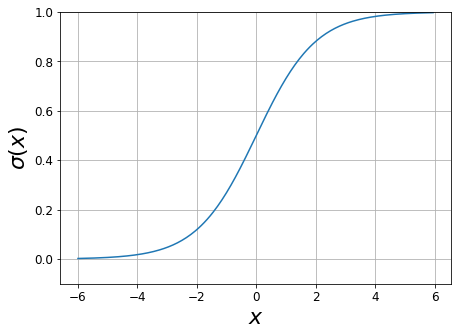

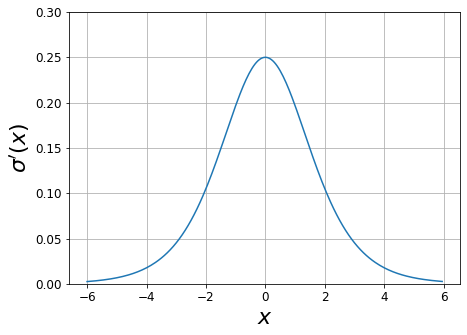

In [6]:
# Sigmoid function and its derivative
def sigmoid_array(x):                                      
    return 1 / (1 + np.exp(-x))

def derivative_sigmoid(x):
  return sigmoid_array(x)*(1-sigmoid_array(x))

X = np.arange(-6.0,6.0,0.05)
Y_sig = sigmoid_array(X)
plt.figure(figsize=(7,5))
plt.plot(X,Y_sig,'-')
plt.ylim(-0.1,1); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$σ(x)$', fontsize=22)
plt.show()


plt.figure(figsize=(7,5))
plt.plot(X,Y_derivative_sig,'-')
plt.ylim(0,0.3); plt.grid(), plt.xlabel('$x$', fontsize=22); plt.ylabel("$σ'(x)$", fontsize=22)
plt.show()


##### Properties

* **+** nonlinear
* **+** "squashing function" -- its range is bounded (0,1)
* **+** derivable everywhere
* **-** (soft) saturation. For larger inputs the derivative is very small (its maximum is 0.25), the network does not learn. (Furthermore these small derivatives are multiplied in deep networks.)
* **-** Not 0 centered (=odd function, f(-x)=-f(x) )
* **-** slow convergence
* **-** computationally expensive because of the exponential function

### Tanh

Closely related to the sigmoid function:

$$\tanh(x) = \frac{e^{2x}-1}{e^{2x}+1} = 2 \sigma(2x) - 1$$

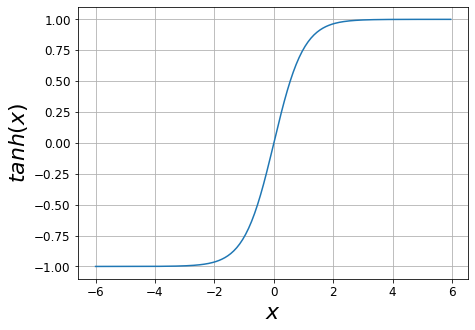

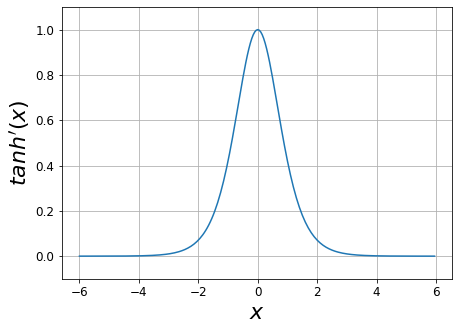

In [7]:
# tanh and its derivative
def tanh_array(x):
  return 2*sigmoid_array(2*x)-1

Y_tanh = tanh_array(X)

plt.figure(figsize=(7,5))
plt.plot(X,Y_tanh,'-')
plt.ylim(-1.1,1.1); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$tanh(x)$', fontsize=22)
plt.show()

def derivative_tanh(x):
  return 1-tanh_array(x)*tanh_array(x)

plt.figure(figsize=(7,5))
Y_derivative_tanh = derivative_tanh(X)
plt.plot(X, Y_derivative_tanh)
plt.ylim(-0.1,1.1); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel("$tanh'(x)$", fontsize=22)
plt.show()

#### Properties

* **+** nonlinear
* **+** "squashing function" to the bounded (-1,1) range
* **+** antisymmetric: f(x)=-f(-x)
* **+** everywhere differentiable
* **+** 0 centered
* **+** steeper derivative
* **-** (soft) saturation -- vanishing gradient problem.
* **-** computationally expensive because of the exponential function

###  Rectified Linear Unit, ReLU

### $ReLU(x) = \max(0, x)$



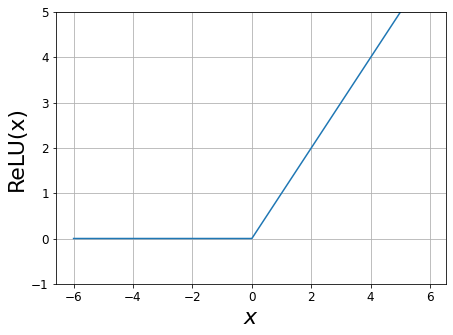

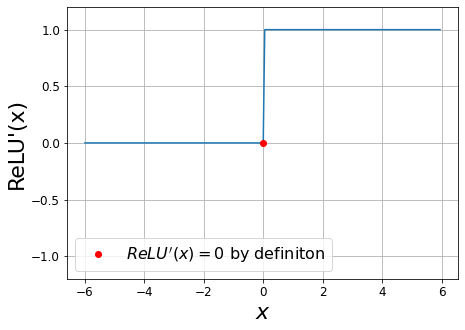

In [8]:
# ReLU and its derivative
def relu_array(x):
    return np.maximum(0,x)
  

Y = relu_array(X)

plt.figure(figsize=(7,5))
plt.plot(X,Y,'-')
plt.ylim(-1,5); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('ReLU(x)', fontsize=22)

plt.figure(figsize=(7,5))
plt.plot(X,np.sign(Y))
plt.plot(0,0,'or',label='$ReLU \'(x)=0$ by definiton') 
plt.ylim(-1.2,1.2); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel("ReLU'(x)", fontsize=22)
plt.legend(loc='best', fontsize=16)

* **+** nonlinear
* **+** it solves (half of the) vanishing gradient problem, good for deep networks
* **+** not intensive computationally
* **+** decreases the number of active neurons -- learns sparse representations
* **-** The average activity is not 0, which causes a "bias shift" in the next layer -- this can slow down learning.
* **-** Neurons can "die", they stop learning. This happens especially when the learning rate is too large.
* **-** Output for positive values not squashed, may initially get very large values, which take long to learn (no squashing) -- need to normalize inputs


### Improved ReLU variants

#### Leaky ReLU

$$lrelu(x) = \max(ax,x)$$
where  $a \in (0,1)$ value, say,  0.1.


Text(0, 0.5, "$LReLU'(x)$")

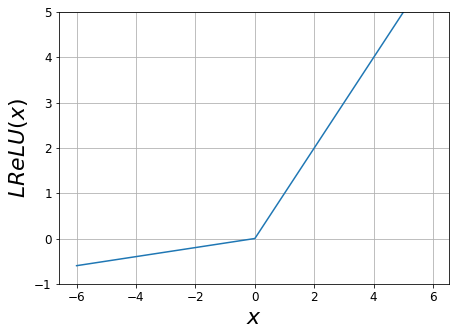

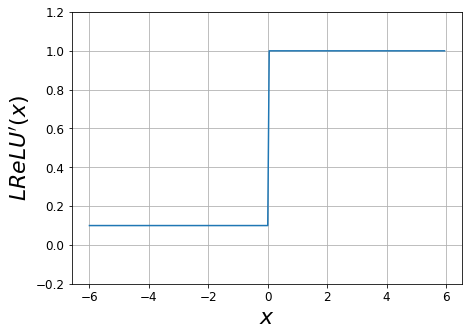

In [9]:
# Leaky ReLU and its derivative
def lrelu_array(x,a=0.1):
    return np.maximum(a*x,x)
  

Y_lrelu = lrelu_array(X)

plt.figure(figsize=(7,5))
plt.plot(X,Y_lrelu,'-')
plt.ylim(-1,5); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$LReLU(x)$', fontsize=22)


def derivative_lrelu(x,a=0.1):
  return np.where(x<0,a,1)
 

Y_derivative_lrelu =derivative_lrelu(X)

plt.figure(figsize=(7,5))
plt.plot(X,Y_derivative_lrelu)
plt.ylim(-0.2,1.2); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel("$LReLU'(x)$", fontsize=22)


Compared to basic ReLU
* **+** The derivative is not 0 in the negative range, so there are no "dead" neurons, the effective capacity of the network increases.

#### Parametric ReLU

In this variant the $a$ parameter of leaky ReLU is treated as a parameter that is learned during the training.

####  Exponential Linear Unit, ELU

A smoothed variant of ReLU

\begin{equation}
  elu(x)\begin{cases}
    x, & \text{if $x>0$}.\\
    \alpha e^x -\alpha, & \text{if $x\leq0$}.
  \end{cases}
\end{equation}

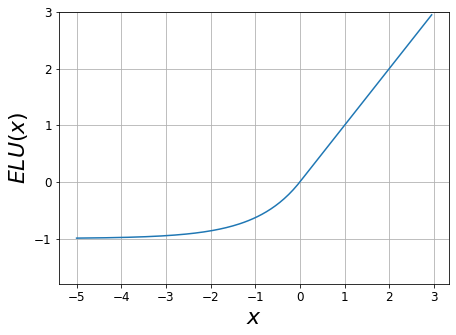

Text(0, 0.5, "$ELU'(x)$")

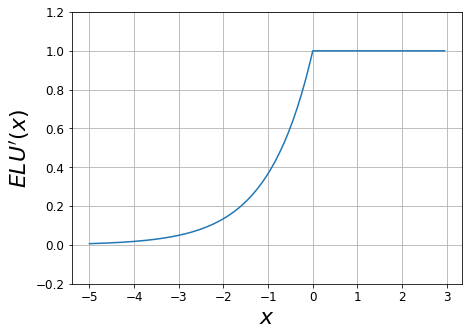

In [10]:
def elu_array(x, alpha=1):
    return np.where(x < 0, alpha * (np.exp(x) - 1), x)
  
X = np.arange(-5.0,3.0,0.05)
Y_elu = elu_array(X)
plt.figure(figsize=(7,5))
plt.plot(X,Y_elu,'-')
plt.ylim(-1.8,3); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$ELU(x)$', fontsize=22)
plt.show()

def derivative_elu(x,alpha=1):
  return np.where(x<0,elu_array(x,alpha)+alpha,1)

Y_derivative_elu =derivative_elu(X,alpha=1)

plt.figure(figsize=(7,5))
plt.plot(X,Y_derivative_elu)
plt.ylim(-0.2,1.2); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel("$ELU'(x)$", fontsize=22)


#### Properties

* **+** Solves the vanishing gradient problem
* **+** In certain cases it generalizes better than RELU
* **-** The exponential makes it computationally more expensive

## Noisy activation functions

An interesting proposal to have strong discriminativity without vanishing gradients: Take a hard saturating, piecewise linear activation function, such as hard tanh (the tanh function's "hardened" (piecewise linear) counterpart):

\begin{equation}
  hardtanh(x)\begin{cases}
    -1 & \text{if $x<-1$}.\\
    x  & \text{if $-1 \leq x \leq 1$}\\
    1 &  \text{if $x > 1$}
  \end{cases}
\end{equation}

and add noise to it ( preferably with saturation dependent variation):

<img src="https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/6362bcef47714b0e0a9f2ded413925ce42720c7a/5-Figure4-1.png" height="400">

Properties:

- **+** the gradient explores even in the saturation intervals
- **+** regularization effect
- **-** complex, computationally intensive

See the [paper](https://arxiv.org/pdf/1603.00391.pdf) for details.

## SWISH: self-gating activation function (from Google Brain)

$$\text{Swish}(x) = x*\sigma(x)$$

It was found by an exhaustive search in the function space!! (See https://arxiv.org/pdf/1710.05941.pdf)

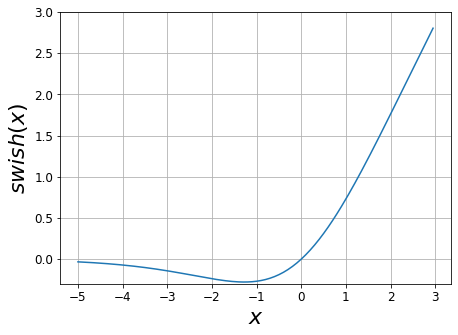

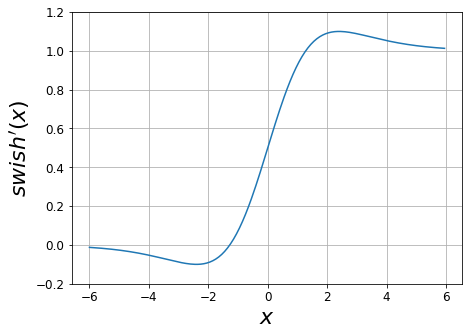

In [11]:
# SWISH fv és deriváltja
def swish_array(x):                                        
   return x*sigmoid_array(x)
  
X = np.arange(-5.0,3.0,0.05)
Y_swish = swish_array(X)
plt.figure(figsize=(7,5))
plt.plot(X,Y_swish,'-')
plt.ylim(-0.3,3); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$swish(x)$', fontsize=22)
plt.show()

def derivative_swish(x):
  return swish_array(x)+sigmoid_array(x)*(1-swish_array(x))

X = np.arange(-6.0,6.0,0.05)
Y_derivative_swish = derivative_swish(X)
plt.figure(figsize=(7,5))
plt.plot(X,Y_derivative_swish,'-')
plt.ylim(-0.2,1.2); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel("$swish'(x)$", fontsize=22)
plt.show()
  

__Properties__

* **+** Not bounded from above: no vanishing gradient (especially on the right, but provides some gradient on the left as well)
* **+** Downward bounded, and left saturates, which has regulative effect
* **+** not monotone, which reduces the sensitivity to learning rate and initialization
* **+** smooth, everywhere differentiable
* **-** computation intensive

* ** ** Output for positive values not squashed, may initially get very large values, which take long to learn (no squashing) -- need to normalize inputs



## MISH: self-gating activation function (from Google Brain)
$$
f(x)=x \tanh (\operatorname{softplus}(x))=x \tanh \left(\ln \left(1+e^{x}\right)\right)
$$

As a development of SWISH (See https://arxiv.org/pdf/1908.08681.pdf)



While not evident at first sight, Mish is closely related to Swish, as it can be observed in the first derivative:
$$
\begin{array}{c}
f^{\prime}(x)=\operatorname{sech}^{2}(\operatorname{soft} \operatorname{plus}(x)) x \operatorname{sig} \operatorname{moid}(x)+\frac{f(x)}{x} \\
=\Delta(x) \operatorname{swish}(x)+\frac{f(x)}{x}
\end{array}
$$
where soft plus$(x)=\ln \left(1+e^{x}\right)$ and $\operatorname{sigmoid}(x)=1 /\left(1+e^{-x}\right)$

From experimental observations, we speculate that the D(x) parameter acts like a preconditioner, making the gradient smoother



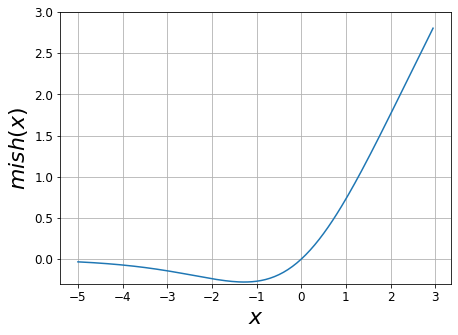

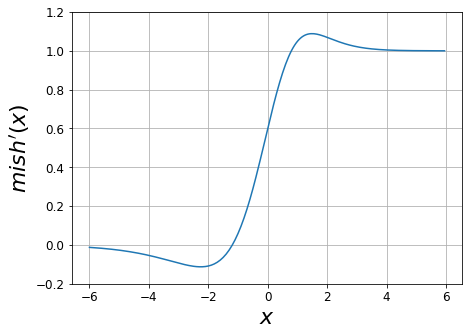

In [12]:
# SWISH fv és deriváltja
def mish_array(x):                                        
   return x*np.tanh(np.log(1+np.exp(x)))
  
   #  xtanh(softplus(x))$$



#where soft plus$(x)=\ln \left(1+e^{x}\right)$
    
    
X = np.arange(-5.0,3.0,0.05)
Y_mish = mish_array(X)
plt.figure(figsize=(7,5))
plt.plot(X,Y_swish,'-')
plt.ylim(-0.3,3); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel('$mish(x)$', fontsize=22)
plt.show()

#def derivative_mish(x):
 # return mish_array(x)+sigmoid_array(x)*(1-mish_array(x))


def derivative_mish(x):
    omega = np.exp(3*x) + 4*np.exp(2*x) + (6+4*x)*np.exp(x) + 4*(1 + x)
    delta = 1 + pow((np.exp(x) + 1), 2)
    derivative = np.exp(x) * omega / pow(delta, 2)
    return derivative


X = np.arange(-6.0,6.0,0.05)
Y_derivative_swish = derivative_mish(X)
plt.figure(figsize=(7,5))
plt.plot(X,Y_derivative_swish,'-')
plt.ylim(-0.2,1.2); plt.grid(); plt.xlabel('$x$', fontsize=22); plt.ylabel("$mish'(x)$", fontsize=22)
plt.show()
  

**Similarities between SWISH and MISH**

While not evident at first sight, Mish is closely related to Swish, as it can be observed in the first derivative:
$$
\begin{array}{c}
f^{\prime}(x)=\operatorname{sech}^{2}(\text {soft plus}(x)) x \operatorname{sigmoid}(x)+\frac{f(x)}{x} \\
=\Delta(x) \operatorname{swish}(x)+\frac{f(x)}{x}
\end{array}
$$


where soft plus$(x)=\ln \left(1+e^{x}\right)$ and sigmoid $(x)=1 /\left(1+e^{-x}\right)$.


The $\Delta(x)$ parameter mimics the behavior of a preconditioner. It provides a strong
regularization effect and helps make gradients smoother, which corresponds to easier to optimize function contour, which is possibly why Mish outperforms Swish in increasingly deep
and complex neural net architectures.


__Properties__
* **+** self-regularized non-monotonic activation function which can be mathematically defined 
* **+**  self gating
* **+** ability to preserve small negative weights, and asmooth profile, have been a recurring discussion bounded below unboundedabove
    
    
    
    

# Nonlinearity for the output layer: Softmax

## Squashing linear output into a probability distribution

We already met the problem of squashing linear output to a probability and used the sigmoid function:

## $\sigma(x) = \frac{ e^x }{1 + e^x}$

the rational being that we consider the linear output as the *logarithm* of the *odds ratio* corresponding to the probability we are looking for. How can we do the same for more than two outcomes?

###  Solution: Softmax function

Let's assume that the output from a linear layer is a series of logarithmic odds (frequently called *logits*  in the literature): 

$$x_0, \dots, x_n$$

then the odds themselves are

$$ e^{x_0},\dots,e^{x_n}$$

and the probabilities will be 

$$\frac{e^{x_0}}{\sum_{i=0}^{n} e^{x_i}},\dots,\frac{e^{x_n}}{\sum_{i=0}^{n} e^{x_i}}$$

Accordingly, for $n$ dimension we define the $n$-dimensional softmax function Softmax$^{(n)}$ to be

$$\mathrm{Softmax}^{(n)}(\langle x_0,\dots,x_n\rangle) = \left\langle \frac{e^{x_0}}{\sum_{i=0}^{n} e^{x_i}},\dots,\frac{e^{x_n}}{\sum_{i=0}^{n} e^{x_i}}\right\rangle$$

The softmax function can be considered to be the generalization of the sigmoid function from 1 to n-dimensional domain. **Advantages:**
- Differentiable
- It squashes  input into the  $[0,1]^n$ $n$-dimensional "unit hypercube"
- For all $\langle y_1,\dots,y_n\rangle$ value $\sum_{i=0}^{n}y_i = 1$

It is typically used for classification tasks with more than two classes.


###  Softmax why this functional form rather than another? - Normalization, probability distribution and weighing
- Want normalization function - all values squashed into a fixed interval
- Converts values into probabilities: 1<=P>=0
- Probability distribution where  $\sum\limits_{i=1}^n P(x)=1$

*There are a number of functions that could full fill the above criteria*

e.g.


$$\frac{x_0}{\sum_{i=0}^{n} x_i},\dots,\frac{x_n}{\sum_{i=0}^{n} x_i}$$

which would also produce probabilities between 0 and 1 and where the sum of all probabilities is 1, so it would fulfill the above criteria


So why take the exponential function?

(1) Weighing - soft*max*, so we give a higher value to

(2) Everywhere differentiable, nowhere <0




<img src="http://drive.google.com/uc?export=view&id=17R92t5bbDE6dSED5JgT24JnRSB-C7cPS" width="65%">


The derivative of $e^x$ is:

$$\frac{d}{d x} e^{x}=e^{x}$$

so we have a non-linear mapping, where larger values get a larger weight!






###  Temperature parameter

If other functions would fit the above criteria of normalization, weighing larger values more heavily, summing to one, being differentiable everywhere, and having and >0, a number of functions might potentially fit this. 

One factor we can vary, is how much more weight will be given to larger values. This results in different shapes of distributions, which is relevant in a number of applications in machine learning. The shape of the distribution is varied through a so called temperature parameter (higher temperature = wider distributions).


$$\operatorname{softmax}(x)_{i}=\frac{e^{\frac{y_{i}}{T}}}{\Sigma_{j}^{N} e^{\frac{y_{j}}{T}}}$$



The different temperatures results in different weighings
<img src="http://drive.google.com/uc?export=view&id=1TxoVoA87aLS5jV9VY6Kbhrpvpv40Z2Tp" width="65%">

<img src="http://drive.google.com/uc?export=view&id=1ozAUuZAysFKpOLCUkEauVOfGWc-CcEpP" width="65%">

In turn leading to wider and narrower distributions
<img src="http://drive.google.com/uc?export=view&id=1WwJsSncSA5Vb6fJ6SJ2hhy_KAKyv_KuK" width="65%">




### Cheaper softmax alternatives

When the linear layer is very wide (e.g., there are a lot of classes in a classification task) computing the full softmax is expensive because even to compute the probability of single output the exponentials of all outputs has to be computed. "Cheaper" alternatives have been developed, e.g. 

####  Hiearchical Softmax

Here we treat the softmax layer as a binary classification tree for a multiclass classification problem, and the linear outputs are at the internal nodes of the tree, where they are interpreted as the logarithms of odds for the classes on the left and right sides of the corresponding subtree:

<img src="https://i.stack.imgur.com/L6siJ.png" width="45%">

To calculate the probability of turning right:

$$ p(\text{right} | n, c) = \sigma (h^\top v'_{n}) $$

Consequently the probability of turning left is:

$$ 1 - p(  \text{right}   |    n,c) $$,

where n stands for node and c denotes the outcome we are interested in.


To calculate the probability corresponding to an individual class one simply multiplies the probabilities belonging to the nodes on the path, e.g. for class $w_2$

$$P(w_2) = (1-\sigma(n(w_2,1)))(1-\sigma(n(w_2,2)))\sigma(n(w_2,3))$$

$$= \sigma(-n(w_2,1))\sigma(-n(w_2,2))\sigma(n(w_2,3))$$

In general, it is enough to compute $\log V$ exponentials to calculate the probability of a single item in the layer.

Since (as we will soon see) during training it's typically enough to calculate the probability of one item, this can significantly speed up training. In contrast, there is typically no speedup for prediction, when all probabilities need to be calculated.

See [Ruder's summary](http://ruder.io/word-embeddings-softmax/) about other alternatives.

## Using probabilities in a loss function: entropy and cross entropy

How should we express the difference between the real distribution and our prediction? We need to be able to measure the "distance" between probability distributions.

### Entropy  

An $E$ event's _information content_ (measured in bits)
$$I(E)=-\log_2 P(E).$$

- Log just introduced as way to give higher weighing to more unlikely events as they contain more information (larger degree of surprise)
- For most applications basis of logarithm does not matter as long as it is kept fix
- From now on we drop it -- typical choices are 2, 10 and $e$ -- Euler's number.

If $X$ is a discrete random variable with values $x_1,\dots,x_n$ then its $X$ _entropy_, $H(X)$ is its  _expected information content_

$$H(X) = \mathbb E(I(X))=\sum_{i=1}^{n}P(X=x_i)I(X=x_i)=-\sum_{i=1}^{n}P(X=x_i)\log P(X=x_i).$$

The idea of entropy is derived from the optimal encoding of messages. If somebody tries to transfer messages about the values of identically distributed and independent random variables on a (noiseless) binary channel then the optimal coding of the messages (which uses the minimum necessary amount of bits) will encode each possible variable value with a series of bits whose length corresponds to the value's information content, and, as a consequence, the optimal average (expected) message length will be the variable's entropy.




<img src="https://upload.wikimedia.org/wikipedia/commons/1/17/Binary_logarithm_plot_with_ticks.svg" width=45%>


### Cross entropy

If $P$ and $\hat{P}$ are two prob. distributions for discrete random variable $X$  then their cross entropy is

$$H(P, \hat{P}) = -\sum_{i=1}^{n}P(X=x_i)\log \hat P(X=x_i).$$

Useful interpretation: if the real distribution is $P$ and the predicted/assumed distribution is $\hat P$, then $H(P, \hat P)$ is the expected average message length with the coding that would be optimal if the assumed $\hat P$ was indeed the real distribution. Since $H(P)$ is the minimal necessary average message length, $H(P,\hat P)\geq H(P)$. 

See https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/ for some  more details.

#### Cross entropy with "trivial"/"one hot" distributions

An important special case for us: if the basis ("real") $P$ distribution has 1 probability for an $x_k$ value  of the variable (and, consequently, 0 for all others) then the cross entropy between $P$ and a predicted $\hat P$ is simply 

$$H(P, \hat{P})=-\log\hat P(X=x_k)$$



<img src="https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png" width=45%>

### Kullback-Leibler divergence aka relative entropy

A closely related, frequently used metric for comparing two probability distributions $P$ and $Q$ is the Kullback-Leibler divergence, which is simply the difference between the cross-entropy between $P$ and $Q$ and $P$'s entropy:

$$
D_{KL}(P \| Q) = H(P, Q) - H(P) =\sum_{i=1}^{n}P(X=x_i)\log \frac{P(X=x_i)}{Q(X=x_i)}.
$$

Important: KL divergence is __not__  symmetric -- in most cases $D_{KL}(P \| Q) \neq D_{KL}(Q \| P)$.